In [1]:
import os
from prepare_datasets_BERT import get_grnti1_2_BERT_dataframes, prepair_datasets, prepair_model,\
    prepair_compute_metrics

from train_test_BERT import train_save_bert, test_save_results
from TrainSettings import TrainSettings
from transformers import TrainingArguments, Trainer
import torch

n = 0 
base_name = "results_4//"

In [2]:
import numpy as np

Удаление элементов второго уровня, количство которых меньше 1
         id_publ                                              title  \
0   19.06-73.269  Некоторые аспекты изменения степных ландшафтов...   
1   19.01-24А.85  Подходы к повышению точности определения харак...   
2   19.06-66.105  Микроскопическое моделирование фазового поля п...   
3   19.06-14Б.10  МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...   
4  19.10-19Ж.456  Трехкомпонентная реакция Кастагноли-Кушмана 3-...   

                                             ref_txt  \
0  Предлагается результат анализа динамики некото...   
1  В статье представлены подходы к повышению точн...   
2  Процесс выделения сплава Ni[75]Al[15]Ti[10] мо...   
3  Объектом исследования является проектирование ...   
4  Попытки использования 3-арилглутаконовых кисло...   

                                             kw_list   SUBJ     IPV  \
0  Урало-Заволжье\анализ динамики\ландшафты\нефте...  f3\e2   72\73   
1  метровый диапазон\обнаружение

100%|██████████| 31/31 [00:18<00:00,  1.64it/s]


Доля оставшихся элементов в тренировочном датасете:  0.9640790988940601


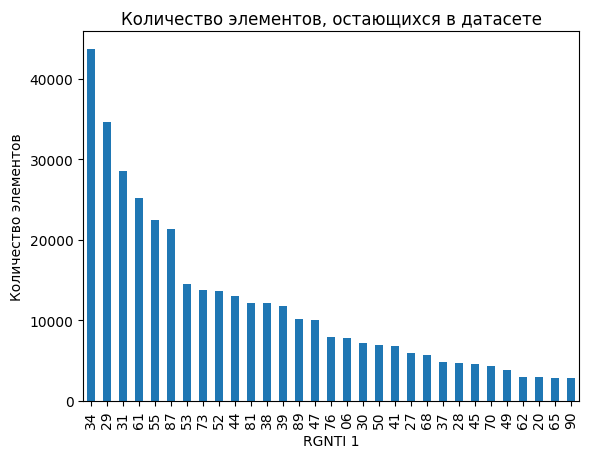

In [3]:
number_of_delteted_values = 16
minimal_number_of_elements_RGNTI2 = 1
minimal_number_of_words = 10
path_info_before_save = base_name + f"data_info_from_bert_level1\\"
if not os.path.exists(path_info_before_save):
    os.makedirs(path_info_before_save)
df, df_test, n_classes, n_classes2 = get_grnti1_2_BERT_dataframes("..\\datasets\\base\\ru\\raw", 
                                            number_of_delteted_values=number_of_delteted_values, 
                                minimal_number_of_elements_RGNTI2=minimal_number_of_elements_RGNTI2,
                                minimal_number_of_words=minimal_number_of_words,
                                dir_name=path_info_before_save)

In [4]:
df.head()

,id_publ,title,ref_txt,kw_list,SUBJ,IPV,RGNTI,eor,target,target_2,target_coded,target_coded2,text
0,19.06-73.269,Некоторые аспекты изменения степных ландшафтов...,Предлагается результат анализа динамики некото...,Урало-Заволжье\анализ динамики\ландшафты\нефте...,f3\e2,72\73,87.29.29\89.57.45\89.57.45,###,"[89, 87]","[89.57, 87.29]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Некоторые аспекты изменения степных ландшафтов...
1,19.01-24А.85,Подходы к повышению точности определения харак...,В статье представлены подходы к повышению точн...,метровый диапазон\обнаружение сигналов\подвижн...,e1,24А,47.05.11,###,[47],[47.05],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Подходы к повышению точности определения харак...
2,19.06-66.105,Микроскопическое моделирование фазового поля п...,Процесс выделения сплава Ni[75]Al[15]Ti[10] мо...,"Ni[75]Al[15]Ti[10], моделирование выделения, к...",f1\f7,15И\66,53.49.05\81.33.07,###,"[53, 81]","[53.49, 81.33]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Микроскопическое моделирование фазового поля п...
3,19.06-14Б.10,МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...,Объектом исследования является проектирование ...,автоматизированное проектирование\обработка ме...,e9,14Б,55.13.15,###,[55],[55.13],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...
4,19.10-19Ж.456,Трехкомпонентная реакция Кастагноли-Кушмана 3-...,Попытки использования 3-арилглутаконовых кисло...,"3-арил-\4,6-диарил-1,6-дигидро-\Кастаньоли_-Ку...",f7,19Ж,31.21.27,###,[31],[31.21],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Трехкомпонентная реакция Кастагноли-Кушмана 3-...


In [32]:
max_number_tokens = 512
pre_trained_model_name ='DeepPavlov/rubert-base-cased'
r = 16
lora_alpha = 16
lora_dropout = 0.05

In [33]:
train_dataset, validation_dataset, test_dataset,\
                                loss_fuction = prepair_datasets(df, df_test, n_classes,
                                                        max_number_tokens=max_number_tokens, 
                                                        pre_trained_model_name=pre_trained_model_name)

Веса для кажого класса:  [1.95268242 2.07531465 1.31752341 0.69765306 1.15226132 0.2089506
 0.91105692 2.34146594 3.16971886 0.42650425 1.98613877 3.24003206
 0.66306812 0.66920483 0.7710127  3.0905765  1.1593955  1.34841807
 1.52527825 1.27408099 0.36223562 3.08014857 0.31907691 1.60435682
 0.75351138 0.27570056 0.75296755 0.62810977 0.40646921 1.86396944
 0.9018316 ]
Подготовка тренировочных данных:


100%|██████████| 226394/226394 [03:12<00:00, 1174.99it/s]


Подготовка валидационных данных:


100%|██████████| 56569/56569 [00:51<00:00, 1101.21it/s]


Подготовка тестовых данных:


100%|██████████| 166183/166183 [02:28<00:00, 1120.85it/s]


In [6]:
epoch= 8
batch_size=8
weight_decay = 1e-6
warmup_steps = 10
fp16 = True
optim = "adamw_bnb_8bit"
dir_name = base_name + f"model bert lora level 1\\"


In [8]:
model = prepair_model(n_classes=n_classes, 
                      pre_trained_model_name=pre_trained_model_name,
                        r=r, lora_alpha=lora_alpha, 
                        lora_dropout=lora_dropout)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
torch.cuda.empty_cache()

In [18]:
model.to("cuda");

In [11]:
sett = TrainSettings()
sett.settings["number_of_delteted_values"] = number_of_delteted_values
sett.settings["minimal_number_of_elements_RGNTI2"] = minimal_number_of_elements_RGNTI2
sett.settings["minimal_number_of_words"] = minimal_number_of_words
sett.settings["max_number_tokens"] = max_number_tokens
sett.settings["pre_trained_model_name"] = pre_trained_model_name
sett.settings["r"] = r
sett.settings["lora_alpha"] = lora_alpha
sett.settings["lora_dropout"] = lora_dropout
sett.settings["epoch"] = epoch
sett.settings["batch_size"] = batch_size
sett.settings["weight_decay"] = weight_decay
sett.settings["warmup_steps"] = warmup_steps
sett.settings["fp16"] = fp16
sett.settings["optim"] = optim
sett.save(path = dir_name)

In [12]:
loss_fuction_for_multiclass_classification = loss_fuction
compute_metrics = prepair_compute_metrics(n_classes=n_classes)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fuction_for_multiclass_classification(logits, labels)

        return (loss, outputs) if return_outputs else loss
training_args = TrainingArguments(
    output_dir=dir_name,          
    num_train_epochs=epoch,
    warmup_steps=warmup_steps,
    logging_dir=dir_name,
    weight_decay=weight_decay,
    eval_strategy='epoch',
    save_strategy= "epoch",
    logging_strategy="steps",
    logging_steps = 100,
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to='tensorboard',
    overwrite_output_dir = False,
    save_safetensors = False,
    fp16=fp16,
    optim = optim,
    per_device_train_batch_size= 16,    # gradient_accumulation_steps=4
    per_device_eval_batch_size= 16
    )

# Создание trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    compute_metrics=compute_metrics
)


In [18]:
trainer.model.device

device(type='cuda', index=0)

In [19]:
#Обучение
trainer.train()

C:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss,Accuracy Micro 0.5,Accuracy Macro 0.5,Accuracy Weighted 0.5,F1 Micro 0.5,F1 Macro 0.5,F1 Weighted 0.5,F1 Micro 0.6,F1 Macro 0.6,F1 Weighted 0.6,F1 Micro 0.7,F1 Macro 0.7,F1 Weighted 0.7,F1 Micro 0.8,F1 Macro 0.8,F1 Weighted 0.8,F1 Micro 0.9,Aucroc Micro,Aucroc Macro,Aucroc Weighted
1,0.066400,0.063622,0.973427,0.973427,0.961239,0.620767,0.520381,0.584143,0.556059,0.431546,0.497551,0.461087,0.332229,0.398425,0.295164,0.042529,0.053174,0.057950,0.867927,0.836140,0.861140
2,0.055200,0.052812,0.977682,0.977682,0.967329,0.702092,0.649455,0.685996,0.664989,0.592870,0.633636,0.602417,0.513494,0.554319,0.500233,0.225663,0.244499,0.283714,0.891969,0.876468,0.887262
3,0.048100,0.046861,0.979857,0.979857,0.970265,0.738563,0.698473,0.725433,0.713609,0.659417,0.689755,0.669735,0.603052,0.633597,0.595689,0.352581,0.377842,0.419887,0.905879,0.894328,0.902119
4,0.047800,0.043900,0.981073,0.981073,0.972036,0.762196,0.735467,0.756645,0.746099,0.712769,0.734481,0.710016,0.664547,0.688841,0.641369,0.443280,0.445572,0.489530,0.918554,0.909805,0.915189
5,0.044000,0.041094,0.982169,0.982169,0.973637,0.773651,0.749604,0.765481,0.756282,0.725064,0.741421,0.721527,0.675614,0.696234,0.660924,0.475103,0.485663,0.530514,0.917694,0.909215,0.914915
6,0.041000,0.040035,0.982702,0.982702,0.974495,0.781871,0.759535,0.776033,0.766041,0.737210,0.754722,0.735829,0.695330,0.715835,0.680374,0.498909,0.508147,0.553034,0.921336,0.912956,0.918599
7,0.041700,0.039399,0.982890,0.982890,0.974864,0.786275,0.764801,0.781687,0.773583,0.749084,0.764505,0.744902,0.710870,0.728176,0.690358,0.526216,0.529773,0.570421,0.924892,0.916781,0.922216
8,0.038500,0.038827,0.983166,0.983166,0.975269,0.788296,0.767489,0.783386,0.773994,0.749565,0.764469,0.742935,0.707733,0.725688,0.688246,0.516873,0.522886,0.565813,0.923633,0.915747,0.921018


TrainOutput(global_step=113200, training_loss=0.052747169094877616, metrics={'train_runtime': 50351.3272, 'train_samples_per_second': 35.97, 'train_steps_per_second': 2.248, 'total_flos': 4.8007252812683674e+17, 'train_loss': 0.052747169094877616, 'epoch': 8.0})

Тестирования результаты, если до это было обучение

In [20]:
evaluation_result_level1 = trainer.predict(test_dataset=test_dataset)

In [21]:
evaluation_result_level1

PredictionOutput(predictions=array([[ -6.4453125,  -5.96875  ,  -6.2578125, ..., -11.0078125,
         -7.5117188, -12.7421875],
       [ -6.8515625,  -6.3828125,  -5.328125 , ...,  -8.828125 ,
         -7.4453125, -12.890625 ],
       [ -4.046875 ,  -6.2734375,  -4.6953125, ...,  -8.7890625,
         -7.1679688, -13.328125 ],
       ...,
       [ -3.6035156, -10.5      ,   3.2285156, ...,  -8.546875 ,
         -5.7382812,  -9.3515625],
       [ -3.0449219,  -5.9921875,  -6.2421875, ...,  -5.3085938,
         -6.6875   , -11.3046875],
       [ -6.203125 ,  -1.5058594,  -8.671875 , ...,  -9.3671875,
         -8.28125  , -14.0625   ]], dtype=float32), label_ids=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), metrics={'test_loss': 0.04061049222946167, 'test_accuracy_micro_0.5': 0.982

In [22]:
test_predictions_level1 = evaluation_result_level1.predictions

In [60]:
trainer.save_model("expriment_save_model")

Установка обученной модели

In [7]:
from peft import TaskType, LoraConfig, get_peft_model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from peft import PeftConfig, PeftModel


In [62]:
# transformers.__version__s

In [8]:
model = AutoModelForSequenceClassification.from_pretrained(pre_trained_model_name,
                                                        problem_type="multi_label_classification",
                                                        num_labels=n_classes,
                                                        torch_dtype=torch.float16)

for param in model.parameters():
    param.requires_grad = False

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
config = PeftConfig.from_pretrained('expriment_save_model')

In [10]:
model = PeftModel.from_pretrained(model, 'expriment_save_model', 
                                  torch_dtype=torch.float16)

In [ ]:
# model.get_layer_status()

[TunerLayerStatus(name='model.bert.encoder.layer.0.attention.self.query', module_type='lora.Linear', enabled=True, active_adapters=['default'], merged_adapters=[], requires_grad={'default': False}, available_adapters=['default'], devices={'default': ['cpu']}),
 TunerLayerStatus(name='model.bert.encoder.layer.0.attention.self.value', module_type='lora.Linear', enabled=True, active_adapters=['default'], merged_adapters=[], requires_grad={'default': False}, available_adapters=['default'], devices={'default': ['cpu']}),
 TunerLayerStatus(name='model.bert.encoder.layer.1.attention.self.query', module_type='lora.Linear', enabled=True, active_adapters=['default'], merged_adapters=[], requires_grad={'default': False}, available_adapters=['default'], devices={'default': ['cpu']}),
 TunerLayerStatus(name='model.bert.encoder.layer.1.attention.self.value', module_type='lora.Linear', enabled=True, active_adapters=['default'], merged_adapters=[], requires_grad={'default': False}, available_adapters=

In [101]:
model.get_model_status()

TunerModelStatus(base_model_type='BertForSequenceClassification', adapter_model_type='LoraModel', peft_types={'default': 'LORA'}, trainable_params=23839, total_params=178490942, num_adapter_layers=24, enabled=True, active_adapters=['default'], merged_adapters=[], requires_grad={'default': False}, available_adapters=['default'], devices={'default': ['cpu']})

Тестирования результаты c помощью trainer

In [13]:
test_trainer = CustomTrainer(model)

In [14]:
test_result_level1_v2 = test_trainer.predict(test_dataset=test_dataset)

c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/20773 [00:00<?, ?it/s]

In [104]:
import numpy as np

In [15]:
test_predictions_level1_v2 = test_result_level1_v2.predictions

In [5]:
from tqdm import tqdm


In [117]:
type(test_result_level1_v2.predictions)

numpy.ndarray

In [118]:
from torch.utils.data import DataLoader


In [5]:
def collate_fn(batch):
    # print(type(batch), len(batch), type(batch[0]), batch[0])
    result = {}
    for el in batch:
        for key in el.keys():
            result.setdefault(key, []).append(el[key])
    for key in result.keys():
        result[key] = torch.tensor(result[key])
    return result
    # tensors, targets = zip(*batch)
    # features = pad_sequence(tensors, batch_first=True)
    # targets = torch.stack(targets)
    # return features, targets


In [120]:
test_dataloader = DataLoader(test_dataset, batch_size=8, collate_fn=collate_fn)


In [121]:
# for el in test_dataloader:
#     # print(el)
#     print(el["attention_mask"].shape)

#     # print(len(el["attention_mask"]))
#     # print(torch.stack(el['input_ids'], dim=1))
#     # print(torch.stack(el['attention_mask'], dim=1))
#     # print(torch.stack(el['labels'], dim=1))
#     break

In [8]:
def make_predictions(model, dataset_test, device):
    model.eval()
    y_pred_list = []
    for batch in tqdm(dataset_test):
        # print(batch['input_ids'])
        # batch = tuple(t.to(device) for t in batch)
        # inputs = 
        # print(torch.stack(batch['input_ids'], dim=1).shape)
        # print(torch.stack(batch['attention_mask'], dim=1).shape)
        # print(torch.stack(batch['labels'], dim=1).shape)


        inputs = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        # y_test = batch['labels'].to(device)
        # batch = 
        with torch.no_grad():
            output = model(inputs, attention_mask = mask)#, labels= y_test)
        
            # Move logits and labels to CPU
            logits = output.logits.detach().cpu()#.numpy()


            # logits_flatten = torch.sigmoid(logits)#.numpy()#.flatten()

            y_pred_list.extend(logits)#logits_flatten)

    return y_pred_list

In [123]:
# model = model.merge_and_unload()

In [124]:
# model.half()

In [125]:
model

PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): BertForSequenceClassification(
      (bert): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(119547, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0-11): 12 x BertLayer(
              (attention): BertAttention(
                (self): BertSdpaSelfAttention(
                  (query): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=True)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.05, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (defau

In [49]:
torch.cuda.empty_cache()

In [50]:
model.to("cuda");

In [25]:
test_predictions_level1 = make_predictions(model, test_dataloader, "cuda")

  0%|          | 0/20773 [00:00<?, ?it/s]c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
100%|██████████| 20773/20773 [1:19:54<00:00,  4.33it/s]


In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm2
import json
import torch
from peft import TaskType, LoraConfig, get_peft_model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from collections import Counter
from sklearn.model_selection import train_test_split
from torchmetrics.classification import MultilabelF1Score, MultilabelAccuracy, MultilabelAUROC
from datasets import Dataset

from ignite.metrics import ClassificationReport
from ignite.engine.engine import Engine

from ignite.metrics.precision import Precision
from ignite.metrics.recall import Recall
from ignite.metrics.metrics_lambda import MetricsLambda
tqdm2.pandas()


In [127]:
n_classes

31

In [128]:
len(test_predictions_level1)

166183

In [129]:
test_dataset.shape

(166183, 4)

In [16]:
test_predictions_level1_2 = torch.tensor(test_predictions_level1_v2)

In [132]:
test_predictions_level1_2.shape

torch.Size([166183, 31])

In [133]:
len(test_dataset['labels'][0])

31

In [25]:
test_predictions_level1_2

tensor([[ -6.4453,  -5.9688,  -6.2578,  ..., -11.0078,  -7.5117, -12.7422],
        [ -6.8516,  -6.3828,  -5.3242,  ...,  -8.8359,  -7.4414, -12.8906],
        [ -4.0430,  -6.2734,  -4.6914,  ...,  -8.7891,  -7.1719, -13.3281],
        ...,
        [ -3.6055, -10.5000,   3.2246,  ...,  -8.5469,  -5.7422,  -9.3516],
        [ -3.0449,  -5.9922,  -6.2422,  ...,  -5.3125,  -6.6914, -11.3125],
        [ -6.2031,  -1.5059,  -8.6719,  ...,  -9.3672,  -8.2812, -14.0547]])

In [20]:
treshold_list = [0.4 + 0.025 * x for x in range(0, 24, 2)]
f1_score_macro_list = []
f1_score_micro_list = []
f1_score_weighted_list = []

for treshold in tqdm(treshold_list):
    multilabel_f1_score_macro = MultilabelF1Score(num_labels=n_classes, average='macro', threshold=treshold)

    f1_score_macro_list.append(multilabel_f1_score_macro(test_predictions_level1_2, #torch.tensor(test_predictions_level1_2)
                                                        torch.tensor(test_dataset['labels'])))

    multilabel_f1_score_micro = MultilabelF1Score(num_labels=n_classes, average='micro', threshold=treshold)

    f1_score_micro_list.append(multilabel_f1_score_micro(test_predictions_level1_2, #torch.tensor(test_predictions_level1_2)
                                                        torch.tensor(test_dataset['labels'])))

    multilabel_f1_score_weighted = MultilabelF1Score(num_labels=n_classes, average='weighted',
                                                      threshold=treshold)

    f1_score_weighted_list.append(multilabel_f1_score_weighted(test_predictions_level1_2,#torch.tensor(test_predictions_level1_2), 
                                                        torch.tensor(test_dataset['labels'])))

100%|██████████| 12/12 [02:28<00:00, 12.40s/it]


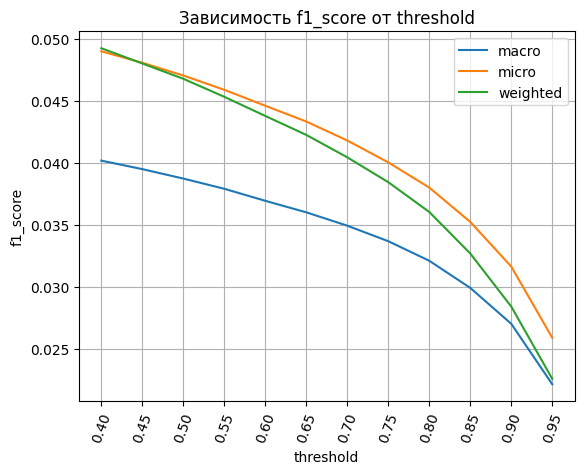

In [21]:

    

plt.plot(treshold_list, f1_score_macro_list, label = "macro")
plt.plot(treshold_list, f1_score_micro_list, label = "micro")
plt.plot(treshold_list, f1_score_weighted_list, label = "weighted")
plt.xticks(treshold_list, rotation=70)
plt.title("Зависимость f1_score от threshold")
plt.xlabel("threshold")
plt.ylabel("f1_score")
plt.legend()
plt.grid()
# plt.savefig(dir_name + "Зависимость f1_score от threshold.png",
#                 bbox_inches='tight')

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)
metric = ClassificationReport(output_dict=True, is_multilabel=True)
weighted_metric_precision = Precision(average='weighted', is_multilabel=True)
weighted_metric_recall= Recall(average='weighted', is_multilabel=True)

preds = (test_predictions_level1_2 > 0.5).int() # torch.tensor(
input = torch.tensor(test_dataset['labels']).int()

precision = Precision(average=False, is_multilabel=True)
recall = Recall(average=False, is_multilabel=True)
F1 = precision * recall * 2 / (precision + recall + 1e-20)
freq = torch.tensor([sum(input[:, i]) for i in range(input.shape[1])])#.tolist()
# weights_per_class = input.shape[0] / (torch.tensor([el if el > 0 else 1 for el in freq])* input.shape[1])
F1_wieghted = MetricsLambda(lambda t: torch.sum(t * freq).item() / input.shape[0], F1) # 

metric.attach(default_evaluator, "cr")
weighted_metric_precision.attach(default_evaluator, "weighted precision")
weighted_metric_recall.attach(default_evaluator, "weighted recall")
F1_wieghted.attach(default_evaluator, "weighted F1")



state = default_evaluator.run([[preds, input]])
result = state.metrics['cr']
result['weighted precision'] = state.metrics['weighted precision']

result['weighted recall'] = state.metrics['weighted recall']
result['weighted F1'] = state.metrics['weighted F1']

# with open(dir_name + "test_results_level1.json", "w") as outfile:
#     json.dump(result, outfile)


In [26]:
torch.save(test_predictions_level1_2, "predictions_first_level.pt")

In [29]:
len(test_dataset['labels']), len(test_dataset['labels'][0])

(166183, 31)

### 1 most certain prediction

In [5]:
from sklearn.metrics import f1_score


In [6]:
test_predictions_level1_2 = torch.load("predictions_first_level.pt")

In [17]:
predictions_1_most_certain= np.zeros(shape = list(test_predictions_level1_2.shape))

In [18]:
label_1_most_certain = np.zeros(shape = list(test_predictions_level1_2.shape))

In [19]:
len(df_test['target_coded'][0])

31

In [28]:
equal_true = []

In [35]:
# test_dataset

In [36]:
test_labels = np.array(test_dataset["labels"])

In [ ]:
for i, el in tqdm(enumerate(test_predictions_level1_2)):
    # print(el)
    index_number = torch.argmax(el).item()
    # print(index_number)
    predictions_1_most_certain[i][index_number] = 1
    label_1_most_certain[i][index_number] = test_labels[i][index_number]

    equal_true.append(test_labels[i][index_number] == 1)


    

166183it [00:01, 131714.14it/s]


In [43]:
f1_score(label_1_most_certain, predictions_1_most_certain, average='weighted')

0.8044845069665505

In [44]:
f1_score(label_1_most_certain, predictions_1_most_certain, average='micro')

0.16938753029301606

In [47]:
sum(equal_true)/ len(equal_true)

0.0658129892949339

#### Level 2

In [7]:
def get_grnti1_2_BERT_dataframes_v2(file_path, number_of_delteted_values, 
                                 minimal_number_of_elements_RGNTI2,
                                 minimal_number_of_words,
                                 dir_name=None):
    df = pd.read_csv(file_path + "\\train_ru.csv", sep='\t', encoding='cp1251')
    df = df.loc[df['RGNTI'].apply(lambda x: re.findall("\d+",x)!=[])] # Пропускаем строки без класса
    df_test = pd.read_csv(file_path + "\\test_ru.csv", sep='\t', encoding='cp1251',
                        error_bad_lines=False)
    df_test = df_test.loc[df_test['RGNTI'].apply(lambda x: re.findall("\d+",x)!=[])]
    df['target'] = df['RGNTI'].apply(lambda x:
                                    list(set([re.findall("\d+",el)[0]
                                                for el in x.split('\\')]))) # Для каждой строки извлекаем значения ГРНТИ 1 уровня

    df_test['target'] = df_test['RGNTI'].apply(lambda x:
                                    list(set([re.findall("\d+",el)[0]
                                                for el in x.split('\\')])))
    df['target_2'] = df['RGNTI'].apply(lambda x:
                                    list(set([re.findall("\d+.\d+",el)[0]
                                                for el in x.split('\\')])))
    df_test['target_2'] = df_test['RGNTI'].apply(lambda x:
                                    list(set([re.findall("\d+.\d+",el)[0]
                                                for el in x.split('\\')])))


    df_trunc = df.copy()

    df_test_trunc = df_test.copy()
    if number_of_delteted_values > 0:

        list_of_few_values = pd.value_counts(np.concatenate(
            df['target'].values))[:-number_of_delteted_values].index.to_list() 
        df_trunc['target'] = df['target'].apply(lambda x: list(set(x) & set(list_of_few_values)))
        df_trunc = df_trunc[df_trunc['target'].apply(lambda x: x != []) ]

        df_test_trunc["target"] = df_test['target'].apply(lambda x: list(set(x) & set(list_of_few_values)))

        df_test_trunc["target"] = df_test_trunc["target"].apply(lambda x: x if x!=[] else ["no class"])


    unique_vals = np.unique(np.concatenate(df_trunc['target'].values))

    list_of_proper_values_target_2 = []
    list_of_inproper_values_target_2 = []
    print(f"Удаление элементов второго уровня, количство которых меньше {minimal_number_of_elements_RGNTI2}")
    print(df_trunc.head())
    for target_2_val in tqdm(unique_vals):
        needed_taget2 = df_trunc['target_2'].apply(lambda x: [re.findall(f"{target_2_val}.\d+",el)[0] for el 
                                                    in x if re.findall(f"{target_2_val}.\d+",el)])
        
        concatenated_list_target2 = pd.value_counts(np.concatenate(np.array([el for el
                                                    in needed_taget2.values.tolist() if el], dtype="object")))
        list_of_proper_values_target_2.extend(concatenated_list_target2[concatenated_list_target2 >= minimal_number_of_elements_RGNTI2].\
                                            index.to_list())
        list_of_inproper_values_target_2.extend(concatenated_list_target2[concatenated_list_target2 < minimal_number_of_elements_RGNTI2].\
                                            index.to_list())
        
    # print(list_of_inproper_values_target_2)
    set_of_proper_values_target_2 = set(list_of_proper_values_target_2)
    # print(set_of_proper_values_target_2)
    df_trunc2 = df_trunc.copy()
    #Код для графика 
    # print("df_trunc['target_2']:", df_trunc['target_2'])
    df_trunc2_deleted = df_trunc['target_2'].apply(lambda x: list(set(x) -
                                                    set_of_proper_values_target_2))
    df_trunc2_deleted = pd.Series([el for el in df_trunc2_deleted if el != []])
    # print("df_trunc2_deleted:", df_trunc2_deleted)
    #Конец кода для графика



    df_trunc2['target_2'] = df_trunc['target_2'].apply(lambda x: list(set(x) &
                                                        set_of_proper_values_target_2))
    df_trunc2 = df_trunc2[df_trunc2['target_2'].apply(lambda x: x != []) ]

    #код для графика 2
    if minimal_number_of_elements_RGNTI2 > 1:
        pd.value_counts(np.concatenate(df_trunc2_deleted.values)).plot.bar()
        plt.xlabel("RGNTI 2")
        plt.ylabel("Количество элементов")
        plt.title("Количество удаляемых текстов из датасета для 2-ого уровня ГРНТИ")
        if dir_name:
            plt.savefig(dir_name + "Количество удаляемых текстов из датасета для 2-ого уровня ГРНТИ.png",
                        bbox_inches='tight')

    else:
        print("Элементы не удаляются из датасета по RGNTI 2")
 
    pd.value_counts(np.concatenate(df_trunc2['target_2'].values)).plot.bar()
    plt.xlabel("RGNTI 2")
    plt.ylabel("Количество элементов")
    plt.title("Количество элементов, остающихся в датасете для 2-ого уровня ГРНТИ")
    # plt.show()
    if dir_name:
        plt.savefig(dir_name + "Количество элементов, остающихся в датасете для 2-ого уровня ГРНТИ.png",
                    bbox_inches='tight')
    #конец кода для графика 2

    df_test_trunc2 = df_test_trunc

    union_of_targets = set(unique_vals)
    coding =  range(len(union_of_targets))
    dict_Vinit_code_int = dict(zip(union_of_targets, coding))

    with open("my_grnti1_int.json", "w") as outfile:
        json.dump(dict_Vinit_code_int, outfile)


    with open('my_grnti1_int.json', "r") as code_file:
        grnti_mapping_dict = json.load(code_file) # Загружаем файл с кодами 
    n_classes = len(grnti_mapping_dict)

    #Уровень 2
    unique_vals_level2 = np.unique(np.concatenate(df_trunc2['target_2'].values))
    union_of_targets2 = set(unique_vals_level2)
    coding2 =  range(len(union_of_targets2))
    dict_Vinit_code_int2 = dict(zip(union_of_targets2, coding2))

    with open("my_grnti2_int.json", "w") as outfile:
        json.dump(dict_Vinit_code_int2, outfile)


    with open('my_grnti2_int.json', "r") as code_file:
        grnti_mapping_dict2 = json.load(code_file) # Загружаем файл с кодами 
    n_classes2 = len(grnti_mapping_dict2)

    #Кодируем классы тренировочного датасета
    df_trunc_result_multiclass_targets = []
    for list_el in df_trunc2['target']:
        classes_zero = [0] * n_classes
        for index in list_el:
            if index in grnti_mapping_dict.keys():
                classes_zero[grnti_mapping_dict[index]] = 1

        df_trunc_result_multiclass_targets.append(classes_zero)

    #Кодируем классы тестового датасета
    df_test_trunc_result_multiclass_targets = []
    for list_el in df_test_trunc2['target']:
        classes_zero = [0] * n_classes
        for index in list_el:
            if index in grnti_mapping_dict.keys():
                classes_zero[grnti_mapping_dict[index]] = 1

        df_test_trunc_result_multiclass_targets.append(classes_zero)
    df_trunc2['target_coded'] = df_trunc_result_multiclass_targets
    df_test_trunc2['target_coded'] = df_test_trunc_result_multiclass_targets

    #Кодируем классы тренировочного датасета level2
    df_trunc_result_multiclass_targets2 = []
    for list_el in df_trunc2['target_2']:
        classes_zero = [0] * n_classes2
        for index in list_el:
            if index in grnti_mapping_dict2.keys():
                classes_zero[grnti_mapping_dict2[index]] = 1

        df_trunc_result_multiclass_targets2.append(classes_zero)

   #Кодируем классы тестового датасета level2
    df_test_trunc_result_multiclass_targets2 = []
    for list_el in df_test_trunc2['target_2']:
        classes_zero = [0] * n_classes2
        for index in list_el:
            if index in grnti_mapping_dict2.keys():
                classes_zero[grnti_mapping_dict2[index]] = 1

        df_test_trunc_result_multiclass_targets2.append(classes_zero)

    df_trunc2['target_coded2'] = df_trunc_result_multiclass_targets2
    df_test_trunc2['target_coded2'] = df_test_trunc_result_multiclass_targets2
############################
    df_trunc2['text'] = (df_trunc2['title'].apply(lambda x:x+' [SEP] ') 
                     + df_trunc2['ref_txt'])
    df_test_trunc2['text'] = (df_test_trunc2['title'].apply(lambda x:x+' [SEP] ')
                                                + df_test_trunc2['ref_txt'])
    
    df_trunc2['text'] = (df_trunc2['text'].apply(lambda x:str(x)+' [SEP] ' ) + df_trunc2['kw_list'])

    df_test_trunc2['text'] = df_test_trunc2['text'].apply(lambda x:str(x)+
                                                          ' [SEP] ') + df_test_trunc2['kw_list']
    
    df_trunc2 = df_trunc2.dropna(subset=['text'], axis=0)
    df_test_trunc2 = df_test_trunc2.dropna(subset=['text'], axis=0)
    df_trunc2 = df_trunc2[df_trunc2['text'].apply(lambda x: len(x.split()) > minimal_number_of_words)]

    print("Доля оставшихся элементов в тренировочном датасете: ", df_trunc2.shape[0] / df.shape[0])

    return df_trunc2, df_test_trunc2, n_classes, n_classes2

C:\Users\victo\AppData\Local\Temp\ipykernel_14512\1775600855.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_v2, df_test_v2, n_classes_v2, n_classes2_v2 = get_grnti1_2_BERT_dataframes_v2("..\\datasets\\base\\ru\\raw",
b'Skipping line 23708: expected 8 fields, saw 9\n'


Удаление элементов второго уровня, количство которых меньше 300
         id_publ                                              title  \
0   19.06-73.269  Некоторые аспекты изменения степных ландшафтов...   
1   19.01-24А.85  Подходы к повышению точности определения харак...   
2   19.06-66.105  Микроскопическое моделирование фазового поля п...   
3   19.06-14Б.10  МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...   
4  19.10-19Ж.456  Трехкомпонентная реакция Кастагноли-Кушмана 3-...   

                                             ref_txt  \
0  Предлагается результат анализа динамики некото...   
1  В статье представлены подходы к повышению точн...   
2  Процесс выделения сплава Ni[75]Al[15]Ti[10] мо...   
3  Объектом исследования является проектирование ...   
4  Попытки использования 3-арилглутаконовых кисло...   

                                             kw_list   SUBJ     IPV  \
0  Урало-Заволжье\анализ динамики\ландшафты\нефте...  f3\e2   72\73   
1  метровый диапазон\обнаружен

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:33<00:00,  1.41it/s]


Доля оставшихся элементов в тренировочном датасете:  0.9528220888159016


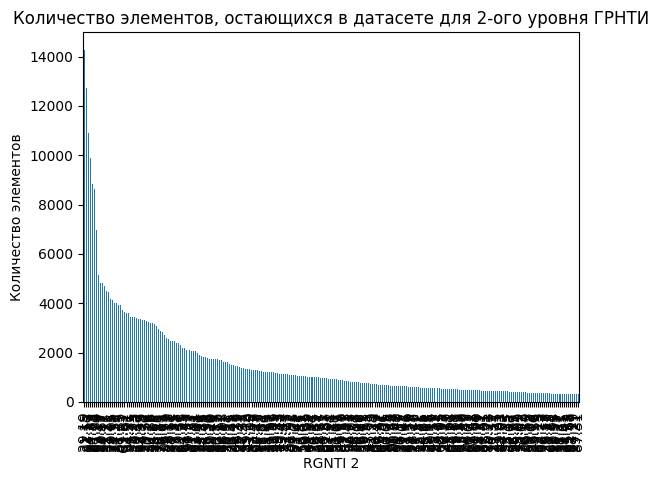

In [138]:
number_of_delteted_values_v2 = 0
minimal_number_of_elements_RGNTI2_v2 = 300
minimal_number_of_words_v2 = 10
path_info_before_save_v2 = base_name + f"data_info_from_bert_level2\\"

if not os.path.exists(path_info_before_save_v2):
    os.makedirs(path_info_before_save_v2)
df_v2, df_test_v2, n_classes_v2, n_classes2_v2 = get_grnti1_2_BERT_dataframes_v2("..\\datasets\\base\\ru\\raw", 
                                            number_of_delteted_values=number_of_delteted_values_v2, 
                                minimal_number_of_elements_RGNTI2=minimal_number_of_elements_RGNTI2_v2,
                                minimal_number_of_words=minimal_number_of_words_v2,
                                dir_name=path_info_before_save_v2)

In [139]:
def get_input_ids_attention_masks_token_type_labels_v2(df, tokenizer, max_len):
    # Токенизация 
    input_ids = []
    attention_masks = []
    token_type_ids =[]
    # Для каждого тектса...
    for sent in tqdm(df['text_with_GRNTI1_names']):
        encoded_dict = tokenizer.encode_plus(
                sent,
                max_length = max_len,
                return_tensors = 'pt',
                truncation=True,
                return_token_type_ids=True,
                return_attention_mask = True,
                padding = 'max_length')
        # Добавляем закодированный текст в list.
        input_ids.append(encoded_dict['input_ids'])
        # Добавляем attention mask (Отделяем padding от non-padding токенов).
        attention_masks.append(encoded_dict['attention_mask'])
        #Добавляем token_type_ids, тк у нас есть [SEP] в тексах 
        token_type_ids.append(encoded_dict['token_type_ids'])

    # Переводим листы в тензоры.
    input_ids= torch.cat(input_ids, dim=0)
    attention_masks= torch.cat(attention_masks, dim=0)
    token_type_ids= torch.cat(token_type_ids, dim=0)
    labels= torch.tensor(df['target_coded2'].to_list()).float()

    return input_ids, attention_masks, token_type_ids, labels

In [140]:
def prepair_datasets_v2(df, df_test, n_classes,
                           max_number_tokens=512, 
                           pre_trained_model_name='DeepPavlov/rubert-base-cased'):
    tokenizer = AutoTokenizer.from_pretrained(pre_trained_model_name, do_lower_case = True)

    
    # Ищем элемнты, c list из target_coded, который встречается только 1 раз
    list_of_keys_less_than_two = []
    for key, val in Counter(df['target_coded2'].apply(lambda x: str(x))).items():
        if val < 2:
            list_of_keys_less_than_two.append(key)
    #Отделяем элементы датасета c list из target_coded, который встречается только 1 раз
    df_trunc_single_example = df[df['target_coded2'].apply(lambda x: str(x) 
                                                                        in list_of_keys_less_than_two)]
    df_trunc_no_less_than_two = df[df['target_coded2'].apply(lambda x: str(x) 
                                                                        not in list_of_keys_less_than_two)]
    # Создаем стратифицированную выборку для обучения и валидации
    train_df_0, valid_df= train_test_split(df_trunc_no_less_than_two, 
                                        stratify=df_trunc_no_less_than_two['target_coded2'].apply(lambda x: str(x)),
                                            test_size=0.2)
    # Добавляем в обучающую выборку элементы начального датасета c list из target_coded, который встречается только 1 раз
    train_df = pd.concat([train_df_0, df_trunc_single_example], ignore_index=True)

    number_of_rows = train_df['target_coded2'].shape[0]
    number_per_class_1 = np.array([train_df['target_coded2'].apply(lambda x: x[index]).sum() 
                                for index in range(n_classes)])

    # Cчитаем веса каждого классов
    weights_per_class = number_of_rows / (number_per_class_1 * n_classes)
    print("Веса для кажого класса: ", weights_per_class)
    print("Подготовка тренировочных данных:")
    input_ids_train, attention_masks_train,\
    token_type_ids_train,\
    labels_train = get_input_ids_attention_masks_token_type_labels_v2(train_df[["target_coded2",
                                                                                "text_with_GRNTI1_names"]], 
                                                                                tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    print("Подготовка валидационных данных:")
    input_ids_validation, attention_masks_validation,\
    token_type_ids_validation,\
    labels_validation = get_input_ids_attention_masks_token_type_labels_v2(valid_df[["target_coded2",
                                                                                "text_with_GRNTI1_names"]], 
                                                                                tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    print("Подготовка тестовых данных:")
    input_ids_test, attention_masks_test,\
    token_type_ids_test,\
    labels_test = get_input_ids_attention_masks_token_type_labels_v2(df_test[["target_coded2",
                                                                                "text_with_GRNTI1_names"]], tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    # Собираем датасеты и делаем shuffle для каждого
    SEED = 1234
    dataset_train_v2 = Dataset.from_dict({"input_ids":input_ids_train,  
                                        "attention_mask":attention_masks_train,  
                                        "labels":labels_train,
                                        "token_type_ids":token_type_ids_train}).shuffle(SEED)

    dataset_valid_v2 = Dataset.from_dict({"input_ids":input_ids_validation,  
                                        "attention_mask":attention_masks_validation,  
                                        "labels":labels_validation,
                                        "token_type_ids":token_type_ids_validation}).shuffle(SEED)
    dataset_test_v2 = Dataset.from_dict({"input_ids":input_ids_test,  
                                      "attention_mask":attention_masks_test,  
                                      "labels":labels_test,
                                      "token_type_ids":token_type_ids_test}).shuffle(SEED)
    


    #Функция потерь с учетом весов для multilabel классификации
    loss_fuction_for_multiclass_classification =\
        torch.nn.BCEWithLogitsLoss(weight = torch.tensor(weights_per_class).float()).to("cuda")
    #Чтобы использовать собственную функцию потерь создаем класс CustomTrainer

    return dataset_train_v2, dataset_valid_v2, dataset_test_v2, loss_fuction_for_multiclass_classification 

In [141]:
with open('my_grnti1_int.json', "r") as code_file:
    grnti_mapping_dict_true_numbers = json.load(code_file) # Загружаем файл с кодами 

In [142]:
with open('GRNTI_1_ru.json', "r", encoding='utf-8') as code_file:
    grnti_mapping_dict_true_names = json.load(code_file) # Загружаем файл с кодами 

In [143]:
list_GRNTI =[]
for el in tqdm(preds):
  list_elments = []

  for index, propab in enumerate(el):
    if propab==1:
      list_elments.append(index) # + 1
  list_GRNTI.append(list_elments)

100%|████████████████████████████████████████████████████████████████████████| 166183/166183 [00:32<00:00, 5036.12it/s]


In [144]:
print("Доля непрдсказанных классов GRNTI 1 для статей:", 
      sum([not el for el in list_GRNTI])/len(list_GRNTI))

Доля непрдсказанных классов GRNTI 1 для статей: 0.13134917530674017


In [145]:
grnti_mapping_dict_true_numbers_reverse = {y: x for x, y in grnti_mapping_dict_true_numbers.items()}


In [146]:
# grnti_mapping_dict_true_numbers_reverse

In [147]:
list_true_numbers_GRNTI = []
for list_el in list_GRNTI:
  list_numbers = []
  for el in list_el:
    list_numbers.append(grnti_mapping_dict_true_numbers_reverse[el])
  list_true_numbers_GRNTI.append(list_numbers)

In [148]:
list_thems = []
for list_true in list_true_numbers_GRNTI:
  sring_per_element = ""
  for el in list_true:
    sring_per_element += grnti_mapping_dict_true_names[el] + "; "
  list_thems.append(sring_per_element)

In [149]:
df_test['text_with_GRNTI1_names'] = list_thems + df_test['text']

In [150]:
list_thems_train = []
for list_true in tqdm(df_v2["target"]):
  sring_per_element = ""
  for el in list_true:
    sring_per_element += grnti_mapping_dict_true_names[el] + "; "
  list_thems_train.append(sring_per_element)

100%|█████████████████████████████████████████████████████████████████████| 279659/279659 [00:00<00:00, 1210480.39it/s]


In [151]:
df_v2['text_with_GRNTI1_names'] = list_thems_train + df_v2['text']

In [152]:
n_classes2_v2

246

In [154]:
del list_true_numbers_GRNTI, list_thems, list_thems_train

In [155]:
train_dataset_v2, validation_dataset_v2, test_dataset_v2,\
                                loss_fuction_v2 = prepair_datasets_v2(df_v2, df_test,
                                                                      n_classes2_v2,
                                                        max_number_tokens=max_number_tokens, 
                                                        pre_trained_model_name=pre_trained_model_name)

Веса для кажого класса:  [1.858296   3.59907131 1.79598627 0.29017369 0.99733301 1.75446058
 0.34116337 3.41035596 2.15263603 1.31965948 0.31109158 3.19496505
 0.43840397 0.96868621 3.65688771 1.79598627 0.8050973  0.47351276
 1.13254358 0.54232581 3.02513303 2.73442955 1.91295177 3.70148391
 2.18360921 2.62410675 2.7676749  0.4591856  1.11452269 1.76466093
 0.89976783 0.31333966 0.22154867 2.2821179  0.69935871 0.65982974
 0.23595881 0.65697333 0.35361749 1.66770154 2.51537304 1.53811662
 2.67027871 0.25463228 1.2664326  0.36924779 3.46222449 0.99406664
 1.8970105  1.1037152  2.10292157 0.74881993 3.19496505 0.35348022
 0.77693263 0.67150814 0.27401897 2.6016144  1.11588853 2.06477333
 0.30484267 0.8622775  1.99685316 2.21010932 0.9396956  0.87723029
 1.75784757 0.45988133 1.14392593 1.62891778 2.50844364 1.97519532
 0.11507204 1.20764594 2.11267991 1.94150328 1.01286434 1.17039208
 1.99685316 2.42171553 0.28508611 0.64624914 0.34014383 2.7181046
 2.65470857 2.6016144  2.2594666  2.23

100%|████████████████████████████████████████████████████████████████████████| 223999/223999 [03:09<00:00, 1179.42it/s]


Подготовка валидационных данных:


100%|██████████████████████████████████████████████████████████████████████████| 55660/55660 [00:45<00:00, 1226.77it/s]


Подготовка тестовых данных:


100%|████████████████████████████████████████████████████████████████████████| 166183/166183 [02:12<00:00, 1251.25it/s]


In [156]:
base_name

'results_4//'

In [157]:
del df, train_dataset, validation_dataset, loss_fuction, evaluation_result_level1

In [165]:
dir_name_v2 = base_name + f"model bert lora level 2\\"
epoch_v2=8
batch_size_v2=8
weight_decay_v2 = 1e-6
warmup_steps_v2 = 10
fp16_v2 = True
optim_v2 = "adamw_bnb_8bit"
model_v2 = prepair_model(n_classes=n_classes2_v2, 
                      pre_trained_model_name=pre_trained_model_name,
                        r=r, lora_alpha=lora_alpha, 
                        lora_dropout=lora_dropout)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [159]:
sett = TrainSettings()
sett.settings["number_of_delteted_values"] = number_of_delteted_values_v2
sett.settings["minimal_number_of_elements_RGNTI2"] = minimal_number_of_elements_RGNTI2_v2
sett.settings["minimal_number_of_words"] = minimal_number_of_words_v2
sett.settings["max_number_tokens"] = max_number_tokens
sett.settings["pre_trained_model_name"] = pre_trained_model_name
sett.settings["r"] = r
sett.settings["lora_alpha"] = lora_alpha
sett.settings["lora_dropout"] = lora_dropout
sett.settings["epoch"] = epoch_v2
sett.settings["batch_size"] = batch_size_v2
sett.settings["weight_decay"] = weight_decay_v2
sett.settings["warmup_steps"] = warmup_steps_v2
sett.settings["fp16"] = fp16_v2
sett.settings["optim"] = optim_v2
sett.save(path = dir_name_v2)

In [166]:

torch.cuda.empty_cache()

In [161]:
1# model_v2.to("cuda")

In [167]:
loss_fuction_for_multiclass_classification_v2 = loss_fuction_v2
compute_metrics_v2 = prepair_compute_metrics(n_classes=n_classes2_v2)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fuction_for_multiclass_classification_v2(logits, labels)

        return (loss, outputs) if return_outputs else loss
training_args_v2 = TrainingArguments(
    output_dir=dir_name_v2,          
    num_train_epochs=16,#epoch_v2,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    warmup_steps=warmup_steps_v2,
    logging_dir=dir_name_v2,
    weight_decay=weight_decay_v2,
    evaluation_strategy='epoch',
    save_strategy= "epoch",
    logging_strategy="steps",
    logging_steps = 100,
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to='tensorboard',
    overwrite_output_dir = False,
    save_safetensors = False,
    fp16=fp16_v2,
    optim = optim_v2)

# Создание trainer
trainer_v2 = CustomTrainer(
    model=model_v2,
    args=training_args_v2,
    train_dataset=train_dataset_v2,
    eval_dataset=validation_dataset_v2,
    compute_metrics=compute_metrics_v2
)


In [168]:
trainer_v2.train()

Epoch,Training Loss,Validation Loss,Accuracy Micro 0.5,Accuracy Macro 0.5,Accuracy Weighted 0.5,F1 Micro 0.5,F1 Macro 0.5,F1 Weighted 0.5,F1 Micro 0.6,F1 Macro 0.6,F1 Weighted 0.6,F1 Micro 0.7,F1 Macro 0.7,F1 Weighted 0.7,F1 Micro 0.8,F1 Macro 0.8,F1 Weighted 0.8,F1 Micro 0.9,Aucroc Micro,Aucroc Macro,Aucroc Weighted
1,0.018900,0.018184,0.994428,0.994428,0.986053,0.012758,0.001580,0.010081,0.001728,0.000243,0.001640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.532707,0.506601,0.531695
2,0.012800,0.011437,0.994921,0.994921,0.988016,0.255194,0.081930,0.183890,0.153083,0.048241,0.110190,0.069454,0.024485,0.050412,0.019904,0.000480,0.000466,0.000472,0.726871,0.622717,0.724136
3,0.010400,0.009206,0.995977,0.995977,0.991197,0.522549,0.272101,0.438941,0.421811,0.198809,0.346017,0.286929,0.130994,0.228111,0.145850,0.026273,0.033111,0.043851,0.830445,0.749119,0.828580
4,0.009100,0.007925,0.996630,0.996630,0.992716,0.638821,0.435254,0.574720,0.571570,0.351603,0.499655,0.459059,0.258343,0.386843,0.304834,0.073411,0.102022,0.130197,0.884249,0.829323,0.882768
5,0.008500,0.007133,0.996996,0.996996,0.993412,0.692664,0.536262,0.647963,0.640801,0.456593,0.582619,0.551142,0.362007,0.482668,0.415768,0.129247,0.164776,0.206377,0.907668,0.867615,0.906446
6,0.007600,0.006550,0.997207,0.997207,0.993889,0.720484,0.583350,0.682394,0.677584,0.508665,0.624973,0.607638,0.422809,0.543330,0.490744,0.179604,0.231126,0.281320,0.915124,0.880329,0.914041
7,0.006700,0.006087,0.997392,0.997392,0.994277,0.744393,0.621063,0.712672,0.711156,0.555313,0.665434,0.651057,0.473811,0.593689,0.542728,0.229012,0.287025,0.345398,0.923711,0.891395,0.922699
8,0.007100,0.005772,0.997532,0.997532,0.994619,0.756289,0.645176,0.727968,0.719775,0.581781,0.678619,0.657983,0.502369,0.604540,0.553087,0.246866,0.303284,0.361997,0.923280,0.893164,0.922392
9,0.006500,0.005655,0.997649,0.997649,0.994868,0.778792,0.700855,0.761187,0.757041,0.652626,0.727891,0.711408,0.582856,0.669053,0.628019,0.334160,0.396557,0.462632,0.938290,0.919167,0.937425
10,0.005900,0.005377,0.997718,0.997718,0.994956,0.782298,0.698280,0.762409,0.757767,0.650594,0.726908,0.710747,0.582411,0.666579,0.629258,0.336556,0.397206,0.463671,0.934938,0.913016,0.934107


TrainOutput(global_step=224000, training_loss=0.008871443251946142, metrics={'train_runtime': 76957.5648, 'train_samples_per_second': 46.571, 'train_steps_per_second': 2.911, 'total_flos': 9.536284518597919e+17, 'train_loss': 0.008871443251946142, 'epoch': 16.0})

In [169]:
trainer_v2.save_model("expriment_save_model2")

In [170]:
del train_dataset_v2, validation_dataset_v2,

In [173]:
test_dataset_v2

Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'token_type_ids'],
    num_rows: 166183
})

In [174]:
trainer_v2

In [171]:
evaluation_result_level2 = trainer_v2.predict(test_dataset_v2)

ValueError: Target size (torch.Size([16, 398])) must be the same as input size (torch.Size([16, 246]))

In [ ]:
test_predictions_level2 = evaluation_result_level2.predictions

In [ ]:
treshold_list_v2 = [0.4 + 0.025 * x for x in range(0, 24, 2)]
f1_score_macro_list_v2 = []
f1_score_micro_list_v2 = []
f1_score_weighted_list_v2 = []

for treshold in tqdm(treshold_list_v2):
    multilabel_f1_score_macro = MultilabelF1Score(num_labels=n_classes2_v2, average='macro', threshold=treshold)

    f1_score_macro_list_v2.append(multilabel_f1_score_macro(torch.tensor(test_predictions_level2), 
                                                        torch.tensor(test_dataset['labels'])))

    multilabel_f1_score_micro = MultilabelF1Score(num_labels=n_classes2_v2, average='micro', threshold=treshold)

    f1_score_micro_list_v2.append(multilabel_f1_score_micro(torch.tensor(test_predictions_level2), 
                                                        torch.tensor(test_dataset['labels'])))

    multilabel_f1_score_weighted = MultilabelF1Score(num_labels=n_classes2_v2, average='weighted',
                                                      threshold=treshold)

    f1_score_weighted_list_v2.append(multilabel_f1_score_weighted(torch.tensor(test_predictions_level2), 
                                                        torch.tensor(test_dataset['labels'])))

In [134]:
test_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'token_type_ids'],
    num_rows: 166183
})

In [ ]:
plt.plot(treshold_list_v2, f1_score_macro_list_v2, label = "macro")
plt.plot(treshold_list_v2, f1_score_micro_list_v2, label = "micro")
plt.plot(treshold_list_v2, f1_score_weighted_list_v2, label = "weighted")
plt.xticks(treshold_list_v2, rotation=70)
plt.title("Зависимость f1_score от threshold дл GRNTI2")
plt.xlabel("threshold")
plt.ylabel("f1_score")
plt.legend()
plt.grid()
plt.savefig(dir_name_v2 + "Зависимость f1_score от threshold дл GRNTI2.png",
                bbox_inches='tight')

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)
metric = ClassificationReport(output_dict=True, is_multilabel=True)
weighted_metric_precision = Precision(average='weighted', is_multilabel=True)
weighted_metric_recall= Recall(average='weighted', is_multilabel=True)

preds = (torch.tensor(test_predictions_level2) > 0.5).int()
input = torch.tensor(test_dataset['labels2']).int()

precision = Precision(average=False, is_multilabel=True)
recall = Recall(average=False, is_multilabel=True)
F1 = precision * recall * 2 / (precision + recall + 1e-20)
freq = torch.tensor([sum(input[:, i]) for i in range(input.shape[1])])#.tolist()
# weights_per_class = input.shape[0] / (torch.tensor([el if el > 0 else 1 for el in freq])* input.shape[1])
F1_wieghted = MetricsLambda(lambda t: torch.sum(t * freq).item() / input.shape[0], F1) # 

metric.attach(default_evaluator, "cr")
weighted_metric_precision.attach(default_evaluator, "weighted precision")
weighted_metric_recall.attach(default_evaluator, "weighted recall")
F1_wieghted.attach(default_evaluator, "weighted F1")



state = default_evaluator.run([[preds, input]])
result = state.metrics['cr']
result['weighted precision'] = state.metrics['weighted precision']

result['weighted recall'] = state.metrics['weighted recall']
result['weighted F1'] = state.metrics['weighted F1']

with open(dir_name + "test_results_level1.json", "w") as outfile:
    json.dump(result, outfile)


In [ ]:
treshold_list = [0.4 + 0.025 * x for x in range(24)]
f1_score_macro_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_macro = MultilabelF1Score(num_labels=n_classes2, average='macro', threshold=treshold)

    f1_score_macro_list.append(multilabel_f1_score_macro(torch.tensor(evaluation_result_level2), 
                                                        torch.tensor(test_dataset_level2['labels'])))
f1_score_micro_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_micro = MultilabelF1Score(num_labels=n_classes2, average='micro', threshold=treshold)

    f1_score_micro_list.append(multilabel_f1_score_micro(torch.tensor(evaluation_result_level2), 
                                                        torch.tensor(test_dataset_level2['labels'])))
    
f1_score_weighted_list = []
for treshold in tqdm(treshold_list):
    multilabel_f1_score_weighted = MultilabelF1Score(num_labels=n_classes2, average='weighted', threshold=treshold)

    f1_score_weighted_list.append(multilabel_f1_score_weighted(torch.tensor(evaluation_result_level2), 
                                                        torch.tensor(test_dataset_level2['labels'])))
    

plt.plot(treshold_list, f1_score_macro_list, label = "macro")
plt.plot(treshold_list, f1_score_micro_list, label = "micro")
plt.plot(treshold_list, f1_score_weighted_list, label = "weighted")
plt.xticks(treshold_list, rotation=70)
plt.title("Зависимость f1_score от threshold")
plt.xlabel("threshold")
plt.ylabel("f1_score")
plt.legend()
plt.grid()
plt.savefig(dir_name + "Зависимость f1_score от threshold.png",
                bbox_inches='tight')

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)
metric = ClassificationReport(output_dict=True, is_multilabel=True)
weighted_metric_precision = Precision(average='weighted', is_multilabel=True)
weighted_metric_recall= Recall(average='weighted', is_multilabel=True)

preds = (torch.tensor(pred_res) > 0.5).int()
input = torch.tensor(daaset_test['labels']).int()

precision = Precision(average=False, is_multilabel=True)
recall = Recall(average=False, is_multilabel=True)
F1 = precision * recall * 2 / (precision + recall + 1e-20)
freq = torch.tensor([sum(input[:, i]) for i in range(input.shape[1])])#.tolist()
# weights_per_class = input.shape[0] / (torch.tensor([el if el > 0 else 1 for el in freq])* input.shape[1])
F1_wieghted = MetricsLambda(lambda t: torch.sum(t * freq).item() / input.shape[0], F1) # 

metric.attach(default_evaluator, "cr")
weighted_metric_precision.attach(default_evaluator, "weighted precision")
weighted_metric_recall.attach(default_evaluator, "weighted recall")
F1_wieghted.attach(default_evaluator, "weighted F1")



state = default_evaluator.run([[preds, input]])
result = state.metrics['cr']
result['weighted precision'] = state.metrics['weighted precision']

result['weighted recall'] = state.metrics['weighted recall']
result['weighted F1'] = state.metrics['weighted F1']

with open(dir_name + "test_results_level1.json", "w") as outfile:
    json.dump(result, outfile)

#### Level 2 bert no label names in train 

In [8]:
def get_input_ids_attention_masks_token_type_labels_v3(df, tokenizer, max_len):
    # Токенизация 
    input_ids = []
    attention_masks = []
    token_type_ids =[]
    # Для каждого тектса...
    for sent in tqdm(df['text']):
        encoded_dict = tokenizer.encode_plus(
                sent,
                max_length = max_len,
                return_tensors = 'pt',
                truncation=True,
                return_token_type_ids=True,
                return_attention_mask = True,
                padding = 'max_length')
        # Добавляем закодированный текст в list.
        input_ids.append(encoded_dict['input_ids'])
        # Добавляем attention mask (Отделяем padding от non-padding токенов).
        attention_masks.append(encoded_dict['attention_mask'])
        #Добавляем token_type_ids, тк у нас есть [SEP] в тексах 
        token_type_ids.append(encoded_dict['token_type_ids'])

    # Переводим листы в тензоры.
    input_ids= torch.cat(input_ids, dim=0)
    attention_masks= torch.cat(attention_masks, dim=0)
    token_type_ids= torch.cat(token_type_ids, dim=0)
    labels= torch.tensor(df['target_coded2'].to_list()).float()

    return input_ids, attention_masks, token_type_ids, labels

In [9]:
def prepair_datasets_v3(df, df_test, n_classes,
                           max_number_tokens=512, 
                           pre_trained_model_name='DeepPavlov/rubert-base-cased'):
    tokenizer = AutoTokenizer.from_pretrained(pre_trained_model_name, do_lower_case = True)

    
    # Ищем элемнты, c list из target_coded, который встречается только 1 раз
    list_of_keys_less_than_two = []
    for key, val in Counter(df['target_coded2'].apply(lambda x: str(x))).items():
        if val < 2:
            list_of_keys_less_than_two.append(key)
    #Отделяем элементы датасета c list из target_coded, который встречается только 1 раз
    df_trunc_single_example = df[df['target_coded2'].apply(lambda x: str(x) 
                                                                        in list_of_keys_less_than_two)]
    df_trunc_no_less_than_two = df[df['target_coded2'].apply(lambda x: str(x) 
                                                                        not in list_of_keys_less_than_two)]
    # Создаем стратифицированную выборку для обучения и валидации
    train_df_0, valid_df= train_test_split(df_trunc_no_less_than_two, 
                                        stratify=df_trunc_no_less_than_two['target_coded2'].apply(lambda x: str(x)),
                                            test_size=0.2)
    # Добавляем в обучающую выборку элементы начального датасета c list из target_coded, который встречается только 1 раз
    train_df = pd.concat([train_df_0, df_trunc_single_example], ignore_index=True)

    number_of_rows = train_df['target_coded2'].shape[0]
    number_per_class_1 = np.array([train_df['target_coded2'].apply(lambda x: x[index]).sum() 
                                for index in range(n_classes)])

    # Cчитаем веса каждого классов
    weights_per_class = number_of_rows / (number_per_class_1 * n_classes)
    print("Веса для кажого класса: ", weights_per_class)
    print("Подготовка тренировочных данных:")
    input_ids_train, attention_masks_train,\
    token_type_ids_train,\
    labels_train = get_input_ids_attention_masks_token_type_labels_v3(train_df[["target_coded2",
                                                                                "text"]], 
                                                                                tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    print("Подготовка валидационных данных:")
    input_ids_validation, attention_masks_validation,\
    token_type_ids_validation,\
    labels_validation = get_input_ids_attention_masks_token_type_labels_v3(valid_df[["target_coded2",
                                                                                "text"]], 
                                                                                tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    print("Подготовка тестовых данных:")
    input_ids_test, attention_masks_test,\
    token_type_ids_test,\
    labels_test = get_input_ids_attention_masks_token_type_labels_v3(df_test[["target_coded2",
                                                                                "text"]], tokenizer=tokenizer,
                                                                   max_len=max_number_tokens)
    # Собираем датасеты и делаем shuffle для каждого
    SEED = 1234
    dataset_train_v2 = Dataset.from_dict({"input_ids":input_ids_train,  
                                        "attention_mask":attention_masks_train,  
                                        "labels":labels_train,
                                        "token_type_ids":token_type_ids_train}).shuffle(SEED)

    dataset_valid_v2 = Dataset.from_dict({"input_ids":input_ids_validation,  
                                        "attention_mask":attention_masks_validation,  
                                        "labels":labels_validation,
                                        "token_type_ids":token_type_ids_validation}).shuffle(SEED)
    dataset_test_v2 = Dataset.from_dict({"input_ids":input_ids_test,  
                                      "attention_mask":attention_masks_test,  
                                      "labels":labels_test,
                                      "token_type_ids":token_type_ids_test}).shuffle(SEED)
    


    #Функция потерь с учетом весов для multilabel классификации
    loss_fuction_for_multiclass_classification =\
        torch.nn.BCEWithLogitsLoss(weight = torch.tensor(weights_per_class).float()).to("cuda")
    #Чтобы использовать собственную функцию потерь создаем класс CustomTrainer

    return dataset_train_v2, dataset_valid_v2, dataset_test_v2, loss_fuction_for_multiclass_classification 

C:\Users\victo\AppData\Local\Temp\ipykernel_29352\437693950.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df_v3, df_test_v3, n_classes_v3, n_classes2_v3 = get_grnti1_2_BERT_dataframes_v2("..\\datasets\\base\\ru\\raw",
b'Skipping line 23708: expected 8 fields, saw 9\n'


Удаление элементов второго уровня, количство которых меньше 300
         id_publ                                              title  \
0   19.06-73.269  Некоторые аспекты изменения степных ландшафтов...   
1   19.01-24А.85  Подходы к повышению точности определения харак...   
2   19.06-66.105  Микроскопическое моделирование фазового поля п...   
3   19.06-14Б.10  МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...   
4  19.10-19Ж.456  Трехкомпонентная реакция Кастагноли-Кушмана 3-...   

                                             ref_txt  \
0  Предлагается результат анализа динамики некото...   
1  В статье представлены подходы к повышению точн...   
2  Процесс выделения сплава Ni[75]Al[15]Ti[10] мо...   
3  Объектом исследования является проектирование ...   
4  Попытки использования 3-арилглутаконовых кисло...   

                                             kw_list   SUBJ     IPV  \
0  Урало-Заволжье\анализ динамики\ландшафты\нефте...  f3\e2   72\73   
1  метровый диапазон\обнаружен

100%|██████████| 47/47 [00:27<00:00,  1.69it/s]


Доля оставшихся элементов в тренировочном датасете:  0.9528220888159016


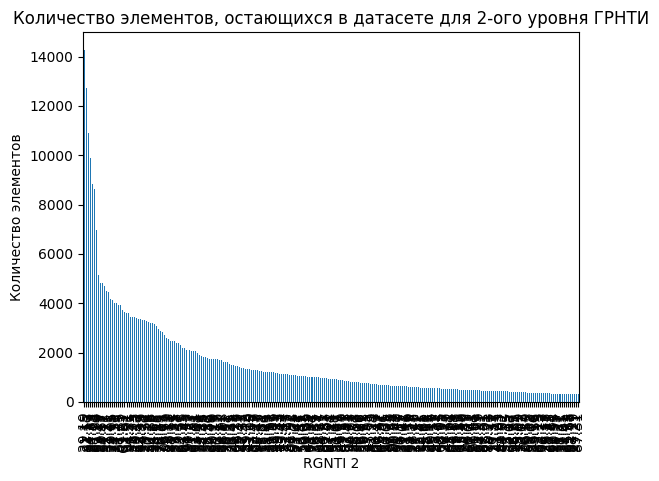

In [10]:
number_of_delteted_values_v3 = 0
minimal_number_of_elements_RGNTI2_v3 = 300
minimal_number_of_words_v3 = 10
path_info_before_save_v3 = base_name + f"data_info_from_bert_level2_no_label_names\\"

if not os.path.exists(path_info_before_save_v3):
    os.makedirs(path_info_before_save_v3)
df_v3, df_test_v3, n_classes_v3, n_classes2_v3 = get_grnti1_2_BERT_dataframes_v2("..\\datasets\\base\\ru\\raw", 
                                            number_of_delteted_values=number_of_delteted_values_v3, 
                                minimal_number_of_elements_RGNTI2=minimal_number_of_elements_RGNTI2_v3,
                                minimal_number_of_words=minimal_number_of_words_v3,
                                dir_name=path_info_before_save_v3)

In [11]:
n_classes2_v3

246

In [12]:
# torch.cuda.is_available()

In [13]:
train_dataset_v3, validation_dataset_v3, test_dataset_v3,\
                                loss_fuction_v3 = prepair_datasets_v3(df_v3, df_test_v3,
                                                                      n_classes2_v3,
                                                        max_number_tokens=max_number_tokens, 
                                                        pre_trained_model_name=pre_trained_model_name)

Веса для кажого класса:  [0.33051363 0.52032288 1.1037152  0.67150814 0.69935871 1.09442914
 3.42317684 2.6469914  0.23644898 0.25463228 1.3177497  0.92162454
 1.11725772 1.01399225 2.5868325  1.1584797  0.34116337 1.03709002
 0.24230044 0.74881993 2.01452443 0.33244434 0.23583658 1.31965948
 0.36291951 1.75784757 0.57376499 1.79598627 1.56723759 0.87470225
 1.6738328  2.10292157 1.11452269 0.86555612 0.39299311 3.3600186
 2.41529189 1.77844735 1.97519532 0.31377155 0.27393653 1.79598627
 1.05633995 1.75446058 1.14392593 1.74104214 0.31109158 0.43882653
 0.94850525 1.76466093 0.07972726 3.04536803 0.25251388 1.37340127
 1.49518069 0.46174698 0.65935195 2.11267991 1.2664326  2.2821179
 0.65649967 3.65688771 1.19496724 2.57950436 0.45895415 1.62311059
 1.8970105  1.20764594 0.94163913 0.9396956  1.1965375  1.17340856
 0.34595936 0.30474064 2.02347787 1.03591017 0.98652767 0.92725564
 2.32287    2.65470857 0.87638599 1.20604641 0.81738334 3.19496505
 2.50844364 3.41035596 1.90894139 2.064

100%|██████████| 223999/223999 [02:56<00:00, 1270.52it/s]


Подготовка валидационных данных:


100%|██████████| 55660/55660 [00:43<00:00, 1271.67it/s]


Подготовка тестовых данных:


100%|██████████| 166183/166183 [02:11<00:00, 1268.22it/s]


In [14]:
del df_v3, df_test_v3

In [15]:
dir_name_v3 = base_name + f"model bert lora level 2 no labels\\"
epoch_v3=16
batch_size_v3=16
weight_decay_v3 = 1e-6
warmup_steps_v3 = 10
fp16_v3 = True
optim_v3 = "adamw_bnb_8bit"
model_v3 = prepair_model(n_classes=n_classes2_v3, 
                      pre_trained_model_name=pre_trained_model_name,
                        r=r, lora_alpha=lora_alpha, 
                        lora_dropout=lora_dropout)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
sett = TrainSettings()
sett.settings["number_of_delteted_values"] = number_of_delteted_values_v3
sett.settings["minimal_number_of_elements_RGNTI2"] = minimal_number_of_elements_RGNTI2_v3
sett.settings["minimal_number_of_words"] = minimal_number_of_words_v3
sett.settings["max_number_tokens"] = max_number_tokens
sett.settings["pre_trained_model_name"] = pre_trained_model_name
sett.settings["r"] = r
sett.settings["lora_alpha"] = lora_alpha
sett.settings["lora_dropout"] = lora_dropout
sett.settings["epoch"] = epoch_v3
sett.settings["batch_size"] = batch_size_v3
sett.settings["weight_decay"] = weight_decay_v3
sett.settings["warmup_steps"] = warmup_steps_v3
sett.settings["fp16"] = fp16_v3
sett.settings["optim"] = optim_v3
sett.save(path = dir_name_v3)

In [17]:
loss_fuction_for_multiclass_classification_v3 = loss_fuction_v3
compute_metrics_v3 = prepair_compute_metrics(n_classes=n_classes2_v3)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fuction_for_multiclass_classification_v3(logits, labels)

        return (loss, outputs) if return_outputs else loss
training_args_v3 = TrainingArguments(
    output_dir=dir_name_v3,          
    num_train_epochs=16,#epoch_v2,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    warmup_steps=warmup_steps_v3,
    logging_dir=dir_name_v3,
    weight_decay=weight_decay_v3,
    evaluation_strategy='epoch',
    save_strategy= "epoch",
    logging_strategy="steps",
    logging_steps = 100,
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to='tensorboard',
    overwrite_output_dir = False,
    save_safetensors = False,
    fp16=fp16_v3,
    optim = optim_v3)

# Создание trainer
trainer_v3 = CustomTrainer(
    model=model_v3,
    args=training_args_v3,
    train_dataset=train_dataset_v3,
    eval_dataset=validation_dataset_v3,
    compute_metrics=compute_metrics_v3
)


c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [18]:
trainer_v3.train()

  0%|          | 0/224000 [00:00<?, ?it/s]

c:\Users\victo\git_Work_VINITI_2024\my_venv_cuda\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


{'loss': 0.4892, 'grad_norm': 0.15199168026447296, 'learning_rate': 4.998013304165365e-05, 'epoch': 0.01}
{'loss': 0.0556, 'grad_norm': 0.0583692267537117, 'learning_rate': 4.995781061654539e-05, 'epoch': 0.01}
{'loss': 0.0359, 'grad_norm': 0.03982099890708923, 'learning_rate': 4.993548819143712e-05, 'epoch': 0.02}
{'loss': 0.0314, 'grad_norm': 0.033564891666173935, 'learning_rate': 4.9913165766328854e-05, 'epoch': 0.03}
{'loss': 0.0294, 'grad_norm': 0.034896694123744965, 'learning_rate': 4.989084334122059e-05, 'epoch': 0.04}
{'loss': 0.028, 'grad_norm': 0.03527175262570381, 'learning_rate': 4.9868520916112326e-05, 'epoch': 0.04}
{'loss': 0.0275, 'grad_norm': 0.026906544342637062, 'learning_rate': 4.9846198491004066e-05, 'epoch': 0.05}
{'loss': 0.0263, 'grad_norm': 0.03518826887011528, 'learning_rate': 4.9823876065895806e-05, 'epoch': 0.06}
{'loss': 0.0268, 'grad_norm': 0.03674136474728584, 'learning_rate': 4.980155364078753e-05, 'epoch': 0.06}
{'loss': 0.0274, 'grad_norm': 0.033466983

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.019793890416622162, 'eval_accuracy_micro_0.5': 0.994438886642456, 'eval_accuracy_macro_0.5': 0.994438886642456, 'eval_accuracy_weighted_0.5': 0.9861226081848145, 'eval_f1_micro_0.5': 0.0029331273399293423, 'eval_f1_macro_0.5': 0.0003950408427044749, 'eval_f1_weighted_0.5': 0.0027701621875166893, 'eval_f1_micro_0.6': 0.0, 'eval_f1_macro_0.6': 0.0, 'eval_f1_weighted_0.6': 0.0, 'eval_f1_micro_0.7': 0.0, 'eval_f1_macro_0.7': 0.0, 'eval_f1_weighted_0.7': 0.0, 'eval_f1_micro_0.8': 0.0, 'eval_f1_macro_0.8': 0.0, 'eval_f1_weighted_0.8': 0.0, 'eval_f1_micro_0.9': 0.0, 'eval_aucroc_micro': 0.5261768698692322, 'eval_aucroc_macro': 0.5047476887702942, 'eval_aucroc_weighted': 0.5247170925140381, 'eval_runtime': 1643.6013, 'eval_samples_per_second': 33.865, 'eval_steps_per_second': 2.117, 'epoch': 1.0}
{'loss': 0.0207, 'grad_norm': 0.04136098921298981, 'learning_rate': 4.685499352649672e-05, 'epoch': 1.01}
{'loss': 0.0202, 'grad_norm': 0.02903877943754196, 'learning_rate': 4.68326711

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.014405583031475544, 'eval_accuracy_micro_0.5': 0.9947404265403748, 'eval_accuracy_macro_0.5': 0.99474036693573, 'eval_accuracy_weighted_0.5': 0.9876335859298706, 'eval_f1_micro_0.5': 0.17791831493377686, 'eval_f1_macro_0.5': 0.040291689336299896, 'eval_f1_weighted_0.5': 0.13191719353199005, 'eval_f1_micro_0.6': 0.09646974503993988, 'eval_f1_macro_0.6': 0.020279645919799805, 'eval_f1_weighted_0.6': 0.0731695145368576, 'eval_f1_micro_0.7': 0.043015703558921814, 'eval_f1_macro_0.7': 0.008956175297498703, 'eval_f1_weighted_0.7': 0.03296487405896187, 'eval_f1_micro_0.8': 0.008201003074645996, 'eval_f1_macro_0.8': 0.00013517950719688088, 'eval_f1_weighted_0.8': 0.00018059872672893107, 'eval_f1_micro_0.9': 0.00018363546405453235, 'eval_aucroc_micro': 0.665296733379364, 'eval_aucroc_macro': 0.5781784653663635, 'eval_aucroc_weighted': 0.662520170211792, 'eval_runtime': 1121.9891, 'eval_samples_per_second': 49.608, 'eval_steps_per_second': 3.101, 'epoch': 2.0}
{'loss': 0.0152, 'g

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.01236058957874775, 'eval_accuracy_micro_0.5': 0.9952186346054077, 'eval_accuracy_macro_0.5': 0.9952186346054077, 'eval_accuracy_weighted_0.5': 0.9893274307250977, 'eval_f1_micro_0.5': 0.33838629722595215, 'eval_f1_macro_0.5': 0.13423705101013184, 'eval_f1_weighted_0.5': 0.2715573012828827, 'eval_f1_micro_0.6': 0.24228869378566742, 'eval_f1_macro_0.6': 0.08335359394550323, 'eval_f1_weighted_0.6': 0.19169878959655762, 'eval_f1_micro_0.7': 0.14775030314922333, 'eval_f1_macro_0.7': 0.04395066201686859, 'eval_f1_weighted_0.7': 0.1137770414352417, 'eval_f1_micro_0.8': 0.07378782331943512, 'eval_f1_macro_0.8': 0.004006538074463606, 'eval_f1_weighted_0.8': 0.009659980423748493, 'eval_f1_micro_0.9': 0.01087892334908247, 'eval_aucroc_micro': 0.7406877279281616, 'eval_aucroc_macro': 0.6562350988388062, 'eval_aucroc_weighted': 0.7385455369949341, 'eval_runtime': 1647.7959, 'eval_samples_per_second': 33.778, 'eval_steps_per_second': 2.111, 'epoch': 3.0}
{'loss': 0.0135, 'grad_norm':

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.011114534921944141, 'eval_accuracy_micro_0.5': 0.9956125617027283, 'eval_accuracy_macro_0.5': 0.995612621307373, 'eval_accuracy_weighted_0.5': 0.9902154803276062, 'eval_f1_micro_0.5': 0.44703608751296997, 'eval_f1_macro_0.5': 0.26110801100730896, 'eval_f1_weighted_0.5': 0.379418283700943, 'eval_f1_micro_0.6': 0.3622482120990753, 'eval_f1_macro_0.6': 0.1929141879081726, 'eval_f1_weighted_0.6': 0.29815781116485596, 'eval_f1_micro_0.7': 0.25908321142196655, 'eval_f1_macro_0.7': 0.12648768723011017, 'eval_f1_weighted_0.7': 0.20687967538833618, 'eval_f1_micro_0.8': 0.1562241017818451, 'eval_f1_macro_0.8': 0.02194124646484852, 'eval_f1_weighted_0.8': 0.04421104118227959, 'eval_f1_micro_0.9': 0.05463840067386627, 'eval_aucroc_micro': 0.7816949486732483, 'eval_aucroc_macro': 0.7193641066551208, 'eval_aucroc_weighted': 0.7799115777015686, 'eval_runtime': 1864.876, 'eval_samples_per_second': 29.846, 'eval_steps_per_second': 1.866, 'epoch': 4.0}
{'loss': 0.0119, 'grad_norm': 0.034

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.010290933772921562, 'eval_accuracy_micro_0.5': 0.9959118962287903, 'eval_accuracy_macro_0.5': 0.9959118366241455, 'eval_accuracy_weighted_0.5': 0.9908862113952637, 'eval_f1_micro_0.5': 0.5135229229927063, 'eval_f1_macro_0.5': 0.3518314063549042, 'eval_f1_weighted_0.5': 0.4579779803752899, 'eval_f1_micro_0.6': 0.43522128462791443, 'eval_f1_macro_0.6': 0.27299606800079346, 'eval_f1_weighted_0.6': 0.3735829293727875, 'eval_f1_micro_0.7': 0.340376079082489, 'eval_f1_macro_0.7': 0.1978195458650589, 'eval_f1_weighted_0.7': 0.28025904297828674, 'eval_f1_micro_0.8': 0.22654056549072266, 'eval_f1_macro_0.8': 0.03726741299033165, 'eval_f1_weighted_0.8': 0.08250077813863754, 'eval_f1_micro_0.9': 0.10713754594326019, 'eval_aucroc_micro': 0.8119909167289734, 'eval_aucroc_macro': 0.7626816034317017, 'eval_aucroc_weighted': 0.8103503584861755, 'eval_runtime': 1887.5059, 'eval_samples_per_second': 29.489, 'eval_steps_per_second': 1.843, 'epoch': 5.0}
{'loss': 0.0109, 'grad_norm': 0.037

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.009675271809101105, 'eval_accuracy_micro_0.5': 0.9961012601852417, 'eval_accuracy_macro_0.5': 0.9961012601852417, 'eval_accuracy_weighted_0.5': 0.9912676811218262, 'eval_f1_micro_0.5': 0.5527676343917847, 'eval_f1_macro_0.5': 0.40519794821739197, 'eval_f1_weighted_0.5': 0.5021510124206543, 'eval_f1_micro_0.6': 0.48534151911735535, 'eval_f1_macro_0.6': 0.33267706632614136, 'eval_f1_weighted_0.6': 0.4284431040287018, 'eval_f1_micro_0.7': 0.39294788241386414, 'eval_f1_macro_0.7': 0.25062432885169983, 'eval_f1_weighted_0.7': 0.3352731466293335, 'eval_f1_micro_0.8': 0.27544909715652466, 'eval_f1_macro_0.8': 0.059989769011735916, 'eval_f1_weighted_0.8': 0.10631575435400009, 'eval_f1_micro_0.9': 0.13604016602039337, 'eval_aucroc_micro': 0.8236612677574158, 'eval_aucroc_macro': 0.7753607034683228, 'eval_aucroc_weighted': 0.8220946192741394, 'eval_runtime': 1627.4186, 'eval_samples_per_second': 34.201, 'eval_steps_per_second': 2.138, 'epoch': 6.0}
{'loss': 0.0101, 'grad_norm': 0

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.009313187561929226, 'eval_accuracy_micro_0.5': 0.9962736368179321, 'eval_accuracy_macro_0.5': 0.9962736368179321, 'eval_accuracy_weighted_0.5': 0.9916695356369019, 'eval_f1_micro_0.5': 0.5903576612472534, 'eval_f1_macro_0.5': 0.4632417559623718, 'eval_f1_weighted_0.5': 0.5474647879600525, 'eval_f1_micro_0.6': 0.5362193584442139, 'eval_f1_macro_0.6': 0.3994079828262329, 'eval_f1_weighted_0.6': 0.4846704602241516, 'eval_f1_micro_0.7': 0.45278191566467285, 'eval_f1_macro_0.7': 0.31739675998687744, 'eval_f1_weighted_0.7': 0.39522114396095276, 'eval_f1_micro_0.8': 0.34051811695098877, 'eval_f1_macro_0.8': 0.10436981171369553, 'eval_f1_weighted_0.8': 0.14875856041908264, 'eval_f1_micro_0.9': 0.18875545263290405, 'eval_aucroc_micro': 0.8424264788627625, 'eval_aucroc_macro': 0.8034046292304993, 'eval_aucroc_weighted': 0.8409590721130371, 'eval_runtime': 1077.569, 'eval_samples_per_second': 51.653, 'eval_steps_per_second': 3.229, 'epoch': 7.0}
{'loss': 0.0095, 'grad_norm': 0.085

  0%|          | 0/3479 [00:00<?, ?it/s]

{'eval_loss': 0.008971371687948704, 'eval_accuracy_micro_0.5': 0.9963579773902893, 'eval_accuracy_macro_0.5': 0.9963579177856445, 'eval_accuracy_weighted_0.5': 0.9918036460876465, 'eval_f1_micro_0.5': 0.605137288570404, 'eval_f1_macro_0.5': 0.48546725511550903, 'eval_f1_weighted_0.5': 0.56472247838974, 'eval_f1_micro_0.6': 0.5530071258544922, 'eval_f1_macro_0.6': 0.421345591545105, 'eval_f1_weighted_0.6': 0.5034002661705017, 'eval_f1_micro_0.7': 0.47528859972953796, 'eval_f1_macro_0.7': 0.3420727849006653, 'eval_f1_weighted_0.7': 0.41895484924316406, 'eval_f1_micro_0.8': 0.3627331554889679, 'eval_f1_macro_0.8': 0.1275106817483902, 'eval_f1_weighted_0.8': 0.16890177130699158, 'eval_f1_micro_0.9': 0.21341001987457275, 'eval_aucroc_micro': 0.8482233881950378, 'eval_aucroc_macro': 0.812275767326355, 'eval_aucroc_weighted': 0.8467906713485718, 'eval_runtime': 1605.6726, 'eval_samples_per_second': 34.665, 'eval_steps_per_second': 2.167, 'epoch': 8.0}
{'loss': 0.0095, 'grad_norm': 0.044718515

KeyboardInterrupt: 

In [ ]:
trainer_v3.save_model("expriment_save_model3")